In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np

In [3]:
PRS= pd.read_csv('/Users/johnlee/Coding/Python/DMI/PRS/ND_ELM_PRS_merged_v2_20210208_with_features.tsv', sep= '\t', index_col=0)
RRSv1= pd.read_csv('/Users/johnlee/Coding/Python/DMI/RRS/RRSv1_20210202.tsv', sep= '\t', index_col= 0)

In [4]:
RRSv1.head()

,Elm,interactorElm,ElmMatch,IUPredLong,IUPredShort,Anchor,interactorDomain,Domain_ID1,DomainMatch1,Evalue1,Domain_ID2,DomainMatch2,Evalue2
,,,,,,,,,,,,,
1,CLV_C14_Caspase3-7,Q91757,396-400,0.850455,0.66760,0.136356,Q14790,SM00115,225-478,3.9e-129,NaN,NaN,NaN
2,CLV_C14_Caspase3-7,P36956,832-836,0.256111,0.38512,0.353938,P55212,SM00115,36-290,0.0,NaN,NaN,NaN
3,CLV_C14_Caspase3-7,O14686,2137-2141,0.787482,0.60044,0.896515,P42574,SM00115,36-277,0.0,NaN,NaN,NaN
4,CLV_C14_Caspase3-7,Q62799,1314-1318,0.441369,0.31768,0.442594,Q14790,SM00115,225-478,3.9e-129,NaN,NaN,NaN
5,CLV_C14_Caspase3-7,Q9UQF2,405-409,0.401703,0.32258,0.411480,Q14790,SM00115,225-478,3.9e-129,NaN,NaN,NaN


In [5]:
PRS.head()

,Elm,interactorElm,ElmMatch,IUPredLong,IUPredShort,Anchor,interactorDomain,HMMOld1,DomainMatchOld1,DomainNameNew1,HMMNew1,DomainMatchNew1,DomainMatchNew1Evalue,DomainSource1,JaccardDistance1,HMMOld2,DomainMatchOld2,DomainNameNew2,HMMNew2,DomainMatchNew2,DomainMatchNew2Evalue,DomainSource2,JaccardDistance2,DMISource,Comment
1324,LIG_CaM_IQ_9,P38377,16-31,0.048580,0.029125,0.008671,P0DP23,PF13499,85-146,EFh,SM00054,12-40|48-76|85-113|121-149,6.39052688397453e-09|5.19072077635924e-09|3.67...,SMART,0.467742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELM,P62161 (mouse protein) is obsolete and demerge...
1325,LIG_CaM_IQ_9,P40146,1194-1209,0.335542,0.281031,0.405147,P0DP23,PF13499,85-146,EFh,SM00054,12-40|48-76|85-113|121-149,6.39052688397453e-09|5.19072077635924e-09|3.67...,SMART,0.467742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELM,P62161 (mouse protein) is obsolete and demerge...
1020,LIG_Rb_LxCxE_1,P0DOV2,418-434,0.618123,0.651388,0.350809,P06400,PF01857,646-765,RB_B,PF01857,646-765,8.4E-37,PFAM,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELM,P15092 (mouse protein) is obsolete in the UniP...
1329,LIG_CaM_IQ_9,Q13698,1526-1542,0.129041,0.119906,0.387483,P0DP23,PF13499,85-146,EFh,SM00054,12-40|48-76|85-113|121-149,6.39052688397453e-09|5.19072077635924e-09|3.67...,SMART,0.467742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELM,P62158 (mouse protein) is obsolete and demerge...
1330,LIG_CaM_IQ_9,Q13936,1669-1685,0.161525,0.176053,0.380697,P0DP23,PF13499,85-146,EFh,SM00054,12-40|48-76|85-113|121-149,6.39052688397453e-09|5.19072077635924e-09|3.67...,SMART,0.467742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELM,P62158 (mouse protein) is obsolete and demerge...


DMI types that are in PRS but not in RRSv1: DOC_CKS1_1, LIG_Dynein_DLC8_1, LIG_GYF, LIG_RPA_C_Vert, LIG_deltaCOP1_diTrp_1, LIG_CID_NIM_1, TRG_Pf-PMV_PEXEL_1 (7 DMI types)

DMI types that are in RRSv1 but not in PRS: 87 DMI types

No. of proteins in PRS but not in RRSv1: 116

No. of proteins in RRSv1 but not in PRS: 25

Note: Keep in mind that isoforms are not included in RRSv1. 

In [6]:
PRS_Elm_set= set(PRS.Elm.to_list())
RRSv1_Elm_set= set(RRSv1.Elm.to_list())

In [7]:
PRS_proteins= set(PRS.interactorElm.to_list() + PRS.interactorDomain.to_list())
RRSv1_proteins= set(RRSv1.interactorElm.to_list() + RRSv1.interactorDomain.to_list())

In [8]:
len(PRS_proteins.difference(RRSv1_proteins))

116

In [9]:
len(RRSv1_proteins.difference(PRS_proteins))

25

In [10]:
len(RRSv1_proteins.intersection(PRS_proteins))

1113

In [11]:
DMI_count_df= pd.DataFrame(data={'Class': ['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG'], 'ElmDB': [11, 25, 31, 164, 37, 22]})
DMI_count_df

,Class,ElmDB
0,CLV,11
1,DEG,25
2,DOC,31
3,LIG,164
4,MOD,37
5,TRG,22


In [12]:
PRS_DMI_count_df= pd.DataFrame(PRS.Elm.unique())
PRS_DMI_count_df= PRS_DMI_count_df.rename(columns= {0: 'Elm'})
PRS_DMI_count_df['Class']= PRS_DMI_count_df.Elm.str.slice(stop=3)
PRS_DMI_count_df.Class.value_counts()

LIG    93
DOC    26
MOD    11
CLV     4
DEG     4
TRG     3
Name: Class, dtype: int64

In [13]:
DMI_count_df= DMI_count_df.merge(PRS_DMI_count_df.Class.value_counts(), left_on= DMI_count_df.Class,
                                 right_on= PRS_DMI_count_df.Class.value_counts().index)

In [14]:
DMI_count_df

,key_0,Class_x,ElmDB,Class_y
0,CLV,CLV,11,4
1,DEG,DEG,25,4
2,DOC,DOC,31,26
3,LIG,LIG,164,93
4,MOD,MOD,37,11
5,TRG,TRG,22,3


In [15]:
DMI_count_df= DMI_count_df[['Class_x', 'ElmDB', 'Class_y']]

In [16]:
RRSv1_DMI_count_df= pd.DataFrame(RRSv1.Elm.unique())
RRSv1_DMI_count_df= RRSv1_DMI_count_df.rename(columns= {0: 'Elm'})
RRSv1_DMI_count_df['Class']= RRSv1_DMI_count_df.Elm.str.slice(stop=3)
RRSv1_DMI_count_df.Class.value_counts()

LIG    130
DOC     29
MOD     22
DEG     19
TRG     12
CLV      9
Name: Class, dtype: int64

In [17]:
DMI_count_df= DMI_count_df.merge(RRSv1_DMI_count_df.Class.value_counts(), left_on= DMI_count_df.Class_x,
                                 right_on= RRSv1_DMI_count_df.Class.value_counts().index)

In [18]:
DMI_count_df= DMI_count_df.rename(columns= {'Class_x': 'Class', 'Class_y': 'PRS', 'Class':'RRSv1'})
DMI_count_df

,key_0,Class,ElmDB,PRS,RRSv1
0,CLV,CLV,11,4,9
1,DEG,DEG,25,4,19
2,DOC,DOC,31,26,29
3,LIG,LIG,164,93,130
4,MOD,MOD,37,11,22
5,TRG,TRG,22,3,12


In [19]:
DMI_count_df= DMI_count_df.drop(columns= 'key_0')

In [20]:
DMI_count_df['PRS_fraction']= DMI_count_df['PRS']/DMI_count_df['ElmDB']
DMI_count_df['RRSv1_fraction']= DMI_count_df['RRSv1']/DMI_count_df['ElmDB']
DMI_count_df

,Class,ElmDB,PRS,RRSv1,PRS_fraction,RRSv1_fraction
0,CLV,11,4,9,0.363636,0.818182
1,DEG,25,4,19,0.160000,0.760000
2,DOC,31,26,29,0.838710,0.935484
3,LIG,164,93,130,0.567073,0.792683
4,MOD,37,11,22,0.297297,0.594595
5,TRG,22,3,12,0.136364,0.545455


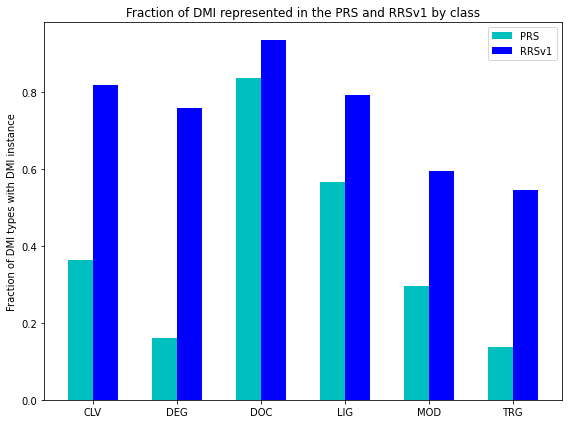

In [103]:
N= 6
ind= np.arange(N)
width= 0.3

plt.figure(figsize= (8,6))
plt.bar(ind, DMI_count_df.PRS_fraction, width, color= 'c', label= 'PRS')
plt.bar(ind + width, DMI_count_df.RRSv1_fraction, width, color= 'b', label= 'RRSv1')

plt.xticks(ind + width / 2, DMI_count_df.Class)
plt.title('Fraction of DMI represented in the PRS and RRSv1 by class')
plt.ylabel('Fraction of DMI types with DMI instance')
plt.legend(loc= 'best')

plt.tight_layout()
plt.savefig('/Users/johnlee/Coding/Python/DMI/PRS_RRS_analysis_plots/DMI_fraction_PRS_RRSv1.pdf')

plt.show()

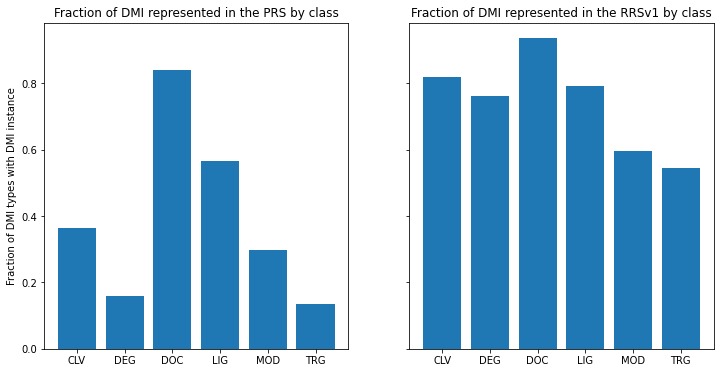

In [22]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize= (12, 6), sharey= True)

ax1.bar(DMI_count_df.Class, DMI_count_df.PRS_fraction)
ax1.set_title('Fraction of DMI represented in the PRS by class')

ax2.bar(DMI_count_df.Class, DMI_count_df.RRSv1_fraction)
ax2.set_title('Fraction of DMI represented in the RRSv1 by class')

ax1.set_ylabel('Fraction of DMI types with DMI instance')

plt.show()

While the representation of DMI types by class in PRS is uneven, that of RRSv1 is rather uniform.

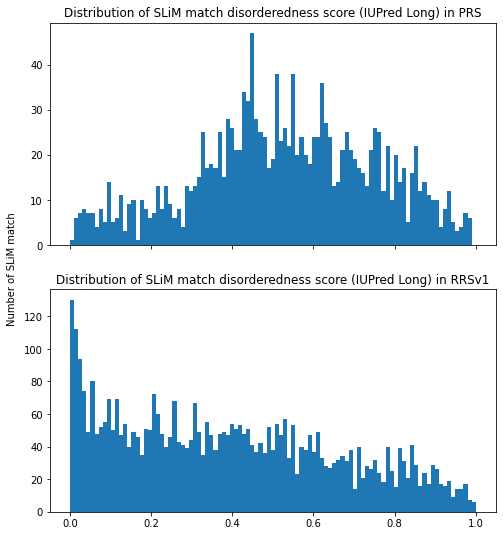

In [109]:
b= np.linspace(0, 1, 100)

fig, (ax1, ax2)= plt.subplots(2, 1, figsize= (8,9), sharex= True)

ax1.hist(PRS.IUPredLong, bins= b)
ax1.set_title('Distribution of SLiM match disorderedness score (IUPred Long) in PRS')

ax2.hist(RRSv1.IUPredLong, bins= b)
ax2.set_title('Distribution of SLiM match disorderedness score (IUPred Long) in RRSv1')

fig.text(0.06, 0.5, 'Number of SLiM match', ha='center', va='center', rotation='vertical')

plt.savefig('/Users/johnlee/Coding/Python/DMI/PRS_RRS_analysis_plots/IUPredLong_PRS_RRSv1.pdf')

plt.show()

Keep in mind that the y axes have different limit, because RRSv1 has more DMI instances than the PRS. 

The distribution of IUPred Long score in PRS appears to be normal, while that of RRSv1 is skewed to the left.

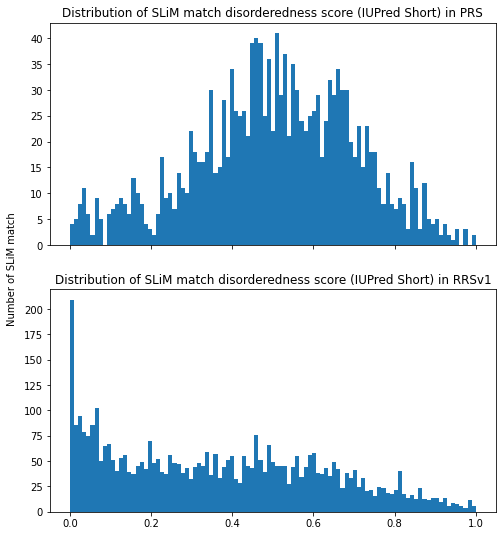

In [108]:
b= np.linspace(0, 1, 100)

fig, (ax1, ax2)= plt.subplots(2, 1, figsize= (8,9), sharex= True)

ax1.hist(PRS.IUPredShort, bins= b)
ax1.set_title('Distribution of SLiM match disorderedness score (IUPred Short) in PRS')

ax2.hist(RRSv1.IUPredShort, bins= b)
ax2.set_title('Distribution of SLiM match disorderedness score (IUPred Short) in RRSv1')

fig.text(0.06, 0.5, 'Number of SLiM match', ha='center', va='center', rotation='vertical')

plt.savefig('/Users/johnlee/Coding/Python/DMI/PRS_RRS_analysis_plots/IUPredShort_PRS_RRSv1.pdf')

plt.show()

The distribution of IUPred Short score in PRS appears to be normal, while that of RRSv1 is skewed to the left.

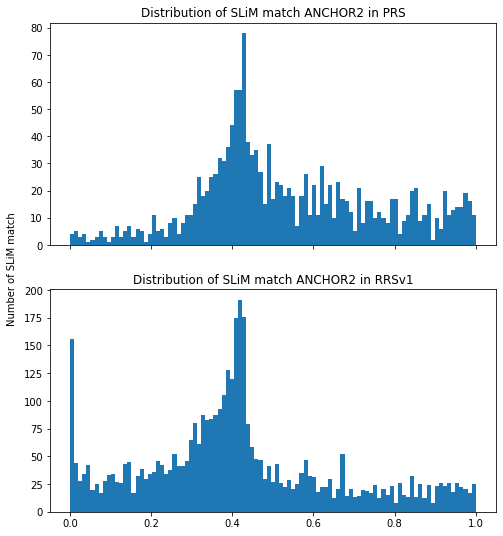

In [107]:
b= np.linspace(0, 1, 100)

fig, (ax1, ax2)= plt.subplots(2, 1, figsize= (8,9), sharex= True)

ax1.hist(PRS.Anchor, bins= b)
ax1.set_title('Distribution of SLiM match ANCHOR2 in PRS')

ax2.hist(RRSv1.Anchor, bins= b)
ax2.set_title('Distribution of SLiM match ANCHOR2 in RRSv1')

fig.text(0.06, 0.5, 'Number of SLiM match', ha='center', va='center', rotation='vertical')

plt.savefig('/Users/johnlee/Coding/Python/DMI/PRS_RRS_analysis_plots/ANCHOR2_PRS_RRSv1.pdf')

plt.show()

The distributions of ANCHOR2 scores in both PRS and RRSv1 appear to be normal, but that of RRSv1 has a peak at the low extremity of the score.

In [26]:
PRS.head()

,Elm,interactorElm,ElmMatch,IUPredLong,IUPredShort,Anchor,interactorDomain,HMMOld1,DomainMatchOld1,DomainNameNew1,HMMNew1,DomainMatchNew1,DomainMatchNew1Evalue,DomainSource1,JaccardDistance1,HMMOld2,DomainMatchOld2,DomainNameNew2,HMMNew2,DomainMatchNew2,DomainMatchNew2Evalue,DomainSource2,JaccardDistance2,DMISource,Comment
1324,LIG_CaM_IQ_9,P38377,16-31,0.048580,0.029125,0.008671,P0DP23,PF13499,85-146,EFh,SM00054,12-40|48-76|85-113|121-149,6.39052688397453e-09|5.19072077635924e-09|3.67...,SMART,0.467742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELM,P62161 (mouse protein) is obsolete and demerge...
1325,LIG_CaM_IQ_9,P40146,1194-1209,0.335542,0.281031,0.405147,P0DP23,PF13499,85-146,EFh,SM00054,12-40|48-76|85-113|121-149,6.39052688397453e-09|5.19072077635924e-09|3.67...,SMART,0.467742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELM,P62161 (mouse protein) is obsolete and demerge...
1020,LIG_Rb_LxCxE_1,P0DOV2,418-434,0.618123,0.651388,0.350809,P06400,PF01857,646-765,RB_B,PF01857,646-765,8.4E-37,PFAM,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELM,P15092 (mouse protein) is obsolete in the UniP...
1329,LIG_CaM_IQ_9,Q13698,1526-1542,0.129041,0.119906,0.387483,P0DP23,PF13499,85-146,EFh,SM00054,12-40|48-76|85-113|121-149,6.39052688397453e-09|5.19072077635924e-09|3.67...,SMART,0.467742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELM,P62158 (mouse protein) is obsolete and demerge...
1330,LIG_CaM_IQ_9,Q13936,1669-1685,0.161525,0.176053,0.380697,P0DP23,PF13499,85-146,EFh,SM00054,12-40|48-76|85-113|121-149,6.39052688397453e-09|5.19072077635924e-09|3.67...,SMART,0.467742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELM,P62158 (mouse protein) is obsolete and demerge...


In [27]:
PRS_evalues= []
for i, r in PRS.iterrows():
    ev= ''
    ev2= ''
    if type(r['DomainMatchNew1Evalue']) == str:
        ev= r['DomainMatchNew1Evalue'].split('|')
        for e in ev:
            PRS_evalues.append(float(e))
    else:
        PRS_evalues.append(float(r['DomainMatchNew1Evalue']))
    if pd.isna(r['DomainMatchNew2Evalue']) == False:
        if type(r['DomainMatchNew2Evalue']) == str:
            ev2= r['DomainMatchNew2Evalue'].split('|')
            for e2 in ev2:
                PRS_evalues.append(float(e2))
        else:
            PRS_evalues.append(float(r['DomainMatchNew2Evalue']))
len(PRS_evalues)

2245

In [28]:
RRSv1_evalues= []
for i, r in RRSv1.iterrows():
    ev= ''
    ev2= ''
    if type(r['Evalue1']) == str:
        ev= r['Evalue1'].split('|')
        for e in ev:
            RRSv1_evalues.append(float(e))
    else:
        RRSv1_evalues.append(float(r['Evalue1']))
    if pd.isna(r['Evalue2']) == False:
        if type(r['Evalue2']) == str:
            ev2= r['Evalue2'].split('|')
            for e2 in ev2:
                RRSv1_evalues.append(float(e2))
        else:
            RRSv1_evalues.append(float(r['Evalue2']))
len(RRSv1_evalues)

9024

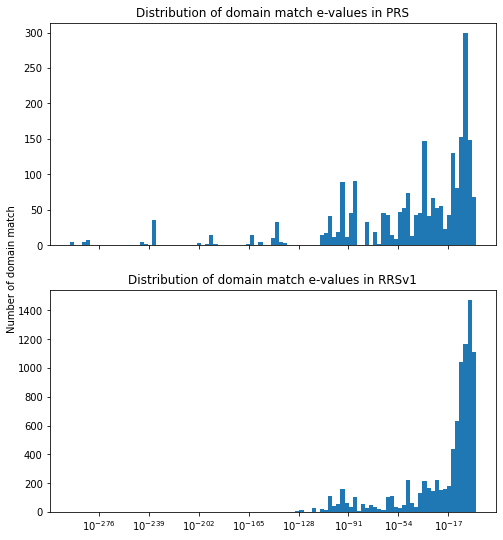

In [110]:
b= np.logspace(np.log10(min([ev for ev in PRS_evalues + RRSv1_evalues if ev != 0])), np.log10(max(PRS_evalues + RRSv1_evalues)), 100)

fig, (ax1, ax2)= plt.subplots(2, 1, figsize= (8,9), sharex= True)

ax1.hist(PRS_evalues, bins= b)
ax1.set_title('Distribution of domain match e-values in PRS')
ax1.set_xscale('log')

ax2.hist(RRSv1_evalues, bins= b)
ax2.set_title('Distribution of domain match e-values in RRSv1')
ax2.set_xscale('log')

fig.text(0.06, 0.5, 'Number of domain match', ha='center', va='center', rotation='vertical')

plt.savefig('/Users/johnlee/Coding/Python/DMI/PRS_RRS_analysis_plots/evalues_PRS_RRSv1.pdf')

plt.show()

The distribution of evalues of domain matches in PRS and RRSv1 are both skewed to the right, but that of PRS has a longer tail to the left, with some instances having extremely low e-values. 

In [100]:
class Protein1:
    def __init__(self):
        self.taxon= 'human'
        
    def _taxon(self):
        return self.taxon
    
class Protein2(Protein1):
    def __init__(self):
        super().__init__()
        self.id= 'id'
        self.name= 'bc'
        
class Protein3(Protein2):
    def __init__(self):
        super().__init__()
        self.length= ''

In [101]:
a= Protein2()

In [102]:
a._taxon()

'human'

In [96]:
a.__dict__

{'taxon': 'human', 'id': 'id', 'name': 'bc', 'length': ''}